In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]


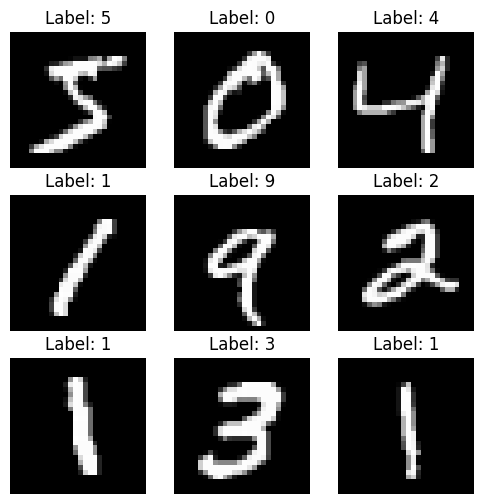

In [2]:
import matplotlib.pyplot as plt
import torchvision

# Load the MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Get some images and labels
fig, axes = plt.subplots(3, 3, figsize=(6, 6))  # 3x3 grid
for i, ax in enumerate(axes.flat):
    image, label = dataset[i]
    ax.imshow(image.squeeze(), cmap='gray')  # Remove extra dimensions and display in grayscale
    ax.set_title(f'Label: {label}')
    ax.axis('off')

## Model description:
     1### First fully connected (linear) layer:
        1. It takes a flattened image of size 28*28 (784) as input
        2. and outputs a feature vector of size 128.

     2### ReLU activation function, applied element-wise.

     3### Second fully connected (linear) layer:
        1. It takes the 128-dimensional feature vector from the first layer
        2. and maps it to 10 outputs, corresponding to the number of classes.
      

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [4]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


## let:
1. Intialize the Model
2. using the loss function --> CrossEntropyLoss
3. optimization using SGD stochastic gradient descent  

## try to change the SGD to Adam and run again:
This will let the model work well the accuracy will increase

In [10]:
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [6]:
# Training loop
epochs = 5
correct = 0 # Initialize correct to 0 before the loop
total = 0  # Initialize total to 0 before the loop
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')



Epoch [1/5], Loss: 1.5714, Accuracy: 55.75%
Epoch [2/5], Loss: 1.0114, Accuracy: 66.78%
Epoch [3/5], Loss: 0.7614, Accuracy: 72.14%
Epoch [4/5], Loss: 0.6938, Accuracy: 75.32%
Epoch [5/5], Loss: 0.4677, Accuracy: 77.48%


In [7]:
# Testing loop
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 87.28%


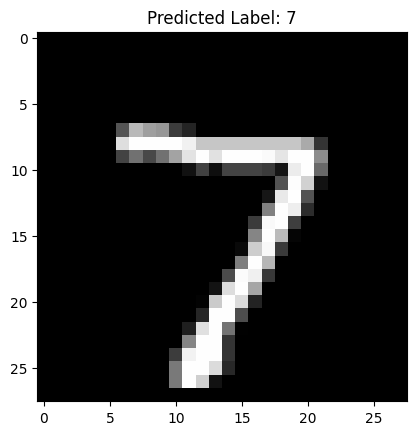

In [9]:
# Function to test with a given input
def predict_image(image):
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()

# Get a sample image from test set and predict its label
sample_image, sample_label = test_dataset[0]
sample_image = sample_image.unsqueeze(0)  # Add batch dimension
predicted_label = predict_image(sample_image)

# Display the image
plt.imshow(sample_image.squeeze().numpy(), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()